In [1]:
import os
import pandas as pd
import shutil
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [2]:
# Plot all model test accuracy
log_names = [x for x in os.listdir('logs') if x.startswith('model_log')]
log_names

['model_log_resnet', 'model_log_xcept', 'model_log_vgg16', 'model_log_cnn']

In [3]:
logs = []
for log_name in log_names:
    logs.append(pd.read_pickle(os.path.join('logs', log_name)))

logs = pd.concat(logs)
logs.head()

,name,type,test_loss,test_accuracy,train_loss,train_accuracy,val_loss,val_accuracy
resnet_1615766266_52e2003f,resnet,resnet,139.115234,0.129032,"[14.690444946289062, 1.7927627563476562, 1.774...","[0.2002640813589096, 0.20510563254356384, 0.20...","[439.9481201171875, 22.03460693359375, 2.87800...","[0.19083969295024872, 0.19847328960895538, 0.2..."
resnet_1615769627_e6d4e97a,resnet-adam,resnet,1.825478,0.120968,"[6.30571985244751, 1.8341883420944214, 1.77140...","[0.18617957830429077, 0.20114436745643616, 0.2...","[4.372488975524902, 1.823502540588379, 1.78398...","[0.17557251453399658, 0.16030533611774445, 0.1..."
resnet_1615771029_b8238cf1,resnet-adam,resnet,2.801850,0.185484,"[3.474008798599243, 2.282191514968872, 2.20243...","[0.19894365966320038, 0.18838028609752655, 0.1...","[1.9780837297439575, 3.048511028289795, 2.0989...","[0.23664122819900513, 0.05343511328101158, 0.2..."
xcept_1615749261_8de8a90e,xcept-dense64,xcept,0.304589,0.862903,"[1.055653691291809, 0.32300758361816406, 0.130...","[0.6311619877815247, 0.88908451795578, 0.96390...","[0.5096596479415894, 0.44000259041786194, 0.36...","[0.8091602921485901, 0.8549618124961853, 0.870..."
xcept_1615752036_568166c6,xcept-dense64,xcept,0.372429,0.895161,"[1.329109787940979, 0.3122906982898712, 0.1111...","[0.6316021084785461, 0.8983274698257446, 0.970...","[0.9269718527793884, 0.3924679458141327, 0.330...","[0.7175572514533997, 0.8702290058135986, 0.893..."


In [4]:
best_model_name = logs.sort_values('test_accuracy').index[-1]
best_model_name

'xcept_1615752036_568166c6'

In [89]:
# load the best model.
model = models.load_model(os.path.join('models', best_model_name + '.h5'))

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 786438    
Total params: 21,647,918
Trainable params: 21,593,390
Non-trainable params: 54,528
_________________________________________________________________


In [95]:
from azureml.core import Run, Workspace

# Load the stored workspace
ws = Workspace.from_config()

run = Run.get(ws, best_model_name)


In [97]:
from azureml.tensorboard import Tensorboard
tb = Tensorboard([run])
tb.start()

http://localhost:6006/


'http://localhost:6006/'

In [103]:
model.optimizer

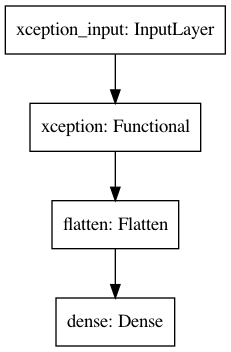

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(
    model
)

In [8]:
model.layers

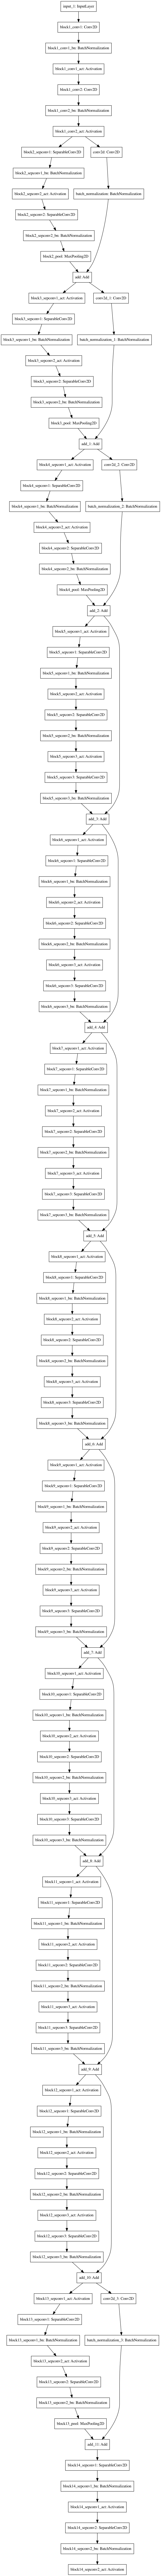

In [9]:
plot_model(model.layers[0])

In [10]:
from tensorflow.keras.applications import Xception
xception = Xception()

In [11]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [12]:
model.layers[0].summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 121, 121, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 121, 121, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 121, 121, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [80]:
print('Creating test ImageDataGenerator')
test_generator = ImageDataGenerator(rescale=1/255)\
                        .flow_from_directory('data/split/test',
                                             target_size = (244, 244),
                                             batch_size = 8)

Creating test ImageDataGenerator
Found 124 images belonging to 6 classes.


In [81]:
class_map = {v:k for k,v in test_generator.class_indices.items()}
class_map

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [86]:
# visualize predictions on testing data

img, label = next(test_generator)
img.shape

(8, 244, 244, 3)

In [87]:
preds = [x.argmax() for x in model.predict(img)]
print(preds)

[4, 4, 4, 3, 1, 3, 1, 4]


(8,)


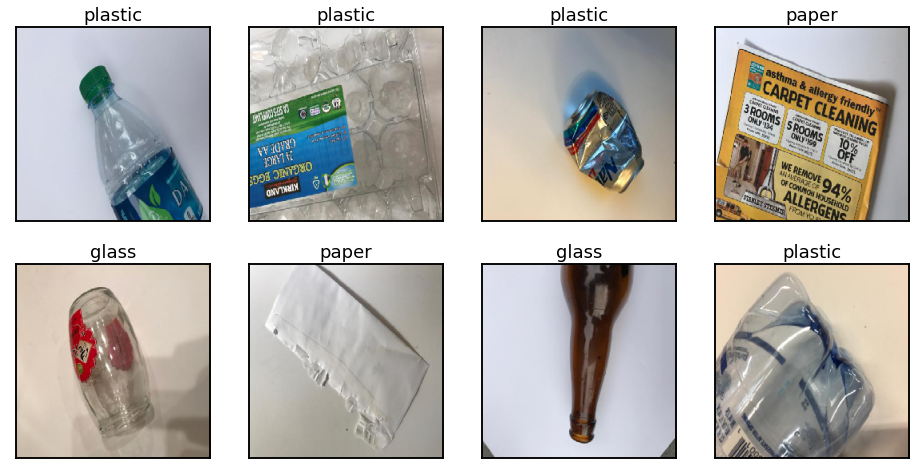

In [88]:
import seaborn as sns

with sns.plotting_context('talk'):
    fig, axs = plt.subplots(2,4, figsize=(16,8))
    axs = np.array(axs).flatten()
    print(axs.shape)
    for i, ax in enumerate(axs):
        ax.imshow(img[i])
        ax.set_title(class_map[preds[i]])
        ax.set_xticks([])
        ax.set_yticks([])

# Visualize filters

In [16]:
model.layers[0].summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 244, 244, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 121, 121, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 121, 121, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 121, 121, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [24]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model

In [36]:
#model = (weights='imagenet', include_top=True)
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [49]:
conv_layers = []
for i in range(0, len(xception.layers)):
    if xception.layers[i].name.startswith('conv2d'):
        conv_layers.append(i)
conv_layers

[12, 22, 32, 122]

0
1
2
3


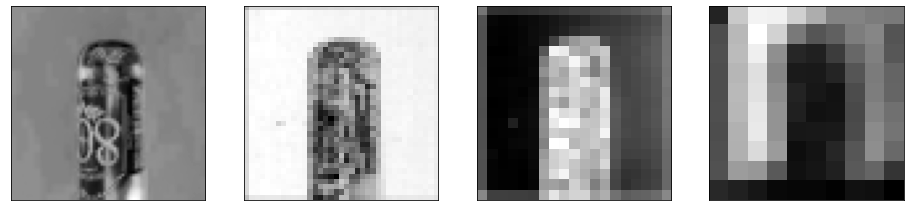

In [134]:
# load the image with the required shape
img = load_img('data/split/test/glass/glass159.jpg', target_size=(299, 299))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

fig, axs = plt.subplots(1,4, figsize=(16,8))
axs = np.array(axs).flatten()

for i, val in enumerate(conv_layers):
    print(i)
    # redefine model to output right after the first hidden layer
    xception2 = Model(inputs=xception.inputs, outputs=xception.layers[val].output)
    #xception2.summary()
    
    # get feature map for first hidden layer
    feature_maps = xception2.predict(img)
    # plot all 64 maps in an 8x8 squares

    axs[i].imshow(feature_maps[0, :, :, 11], cmap='gray')
    #axs[i].imshow(feature_maps[0, :, :, 11+1], cmap='gray')

    axs[i].set_xticks([])
    axs[i].set_yticks([])
    #plt.show()

this layer is shape: (1, 74, 74, 128)


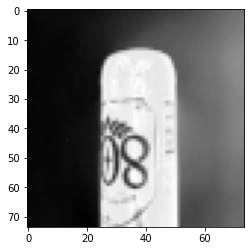

this layer is shape: (1, 37, 37, 256)


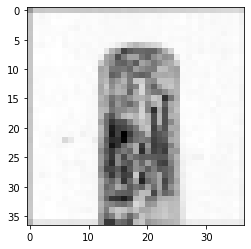

this layer is shape: (1, 19, 19, 728)


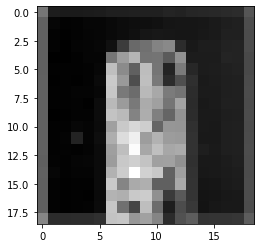

this layer is shape: (1, 10, 10, 1024)


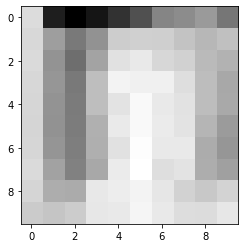

In [130]:
# load the image with the required shape
img = load_img('data/split/test/glass/glass159.jpg', target_size=(244, 244))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

#fig, axs = plt.subplots(4,2, figsize=(8,16))
#axs = np.array(axs).flatten()

for val in conv_layers:

    #fig, axs = plt.subplots(1,2, figsize=(8,16))
    #axs = np.array(axs).flatten()

    # redefine model to output right after the first hidden layer
    xception2 = Model(inputs=xception.inputs, outputs=xception.layers[val].output)
    #xception2.summary()
    
    # get feature map for first hidden layer
    feature_maps = xception2.predict(img)

    print('this layer is shape:', feature_maps.shape)
    
    plt.imshow(feature_maps[0, :, :, 10], cmap='gray')
    plt.show()
    #axs[1].imshow(feature_maps[0, :, :, 12], cmap='gray')

#     axs[0].set_xticks([])
#     axs[0].set_yticks([])
    
#     axs[1].set_xticks([])
#     axs[1].set_yticks([])
    #plt.show()